# Load CSV data

In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

2024-11-13 18:49:20.982259: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## In memory data

In [2]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"]
)

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [4]:
abalone_features = abalone_features.to_numpy()
abalone_features.shape

(3320, 7)

In [5]:
abalone_model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

abalone_model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam()
)

In [6]:
abalone_model.fit(
    abalone_features,
    abalone_labels,
    epochs=10,
)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - loss: 93.1252
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 35.9990
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 10.2247
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 8.8948
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 8.3262
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 8.3464
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 7.7432
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 7.0334
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 6.3343
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 6.4618


## Basic preprocessing

In [7]:
normalize = layers.Normalization()
normalize.adapt(abalone_features)

In [8]:
normalize

<Normalization name=normalization, built=True>

In [9]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

norm_abalone_model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam()
)

norm_abalone_model.fit(
    abalone_features,
    abalone_labels,
    epochs=10
)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - loss: 101.1103
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 50.8346
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 31.4299
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 21.5592
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.3989
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 8.2203
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 7.4638
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 6.9658
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 5.5443
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2090


## Mixed data types

In [10]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [11]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [12]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesnt have a value
result

<KerasTensor shape=(None,), dtype=float32, sparse=False, name=keras_tensor_9>

In [13]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [14]:
print(calc(np.array([1])).numpy())
print(calc(np.array([2])).numpy())

[3.]
[5.]


In [15]:
inputs = {}

for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32

    inputs[name] = tf.keras.Input(
        shape=(1,),
        name=name,
        dtype=dtype,
    )

inputs

{'sex': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=sex>,
 'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'n_siblings_spouses': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=n_siblings_spouses>,
 'parch': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=parch>,
 'fare': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=fare>,
 'class': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=class>,
 'deck': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=deck>,
 'embark_town': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=embark_town>,
 'alone': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=alone>}

In [16]:
numeric_inputs = {
    name: input for name, input in inputs.items() if input.dtype==tf.float32
}

x = layers.Concatenate()(list(numeric_inputs.values()))

norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeirc_inputs = norm(x)

all_numeirc_inputs

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_11>

In [17]:
preprocessed_inputs = [all_numeirc_inputs]

In [18]:
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue

    lookup = layers.StringLookup(
        vocabulary=np.unique(titanic_features[name])
    )

    one_hot = layers.CategoryEncoding(
        num_tokens=lookup.vocabulary_size()
    )

    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

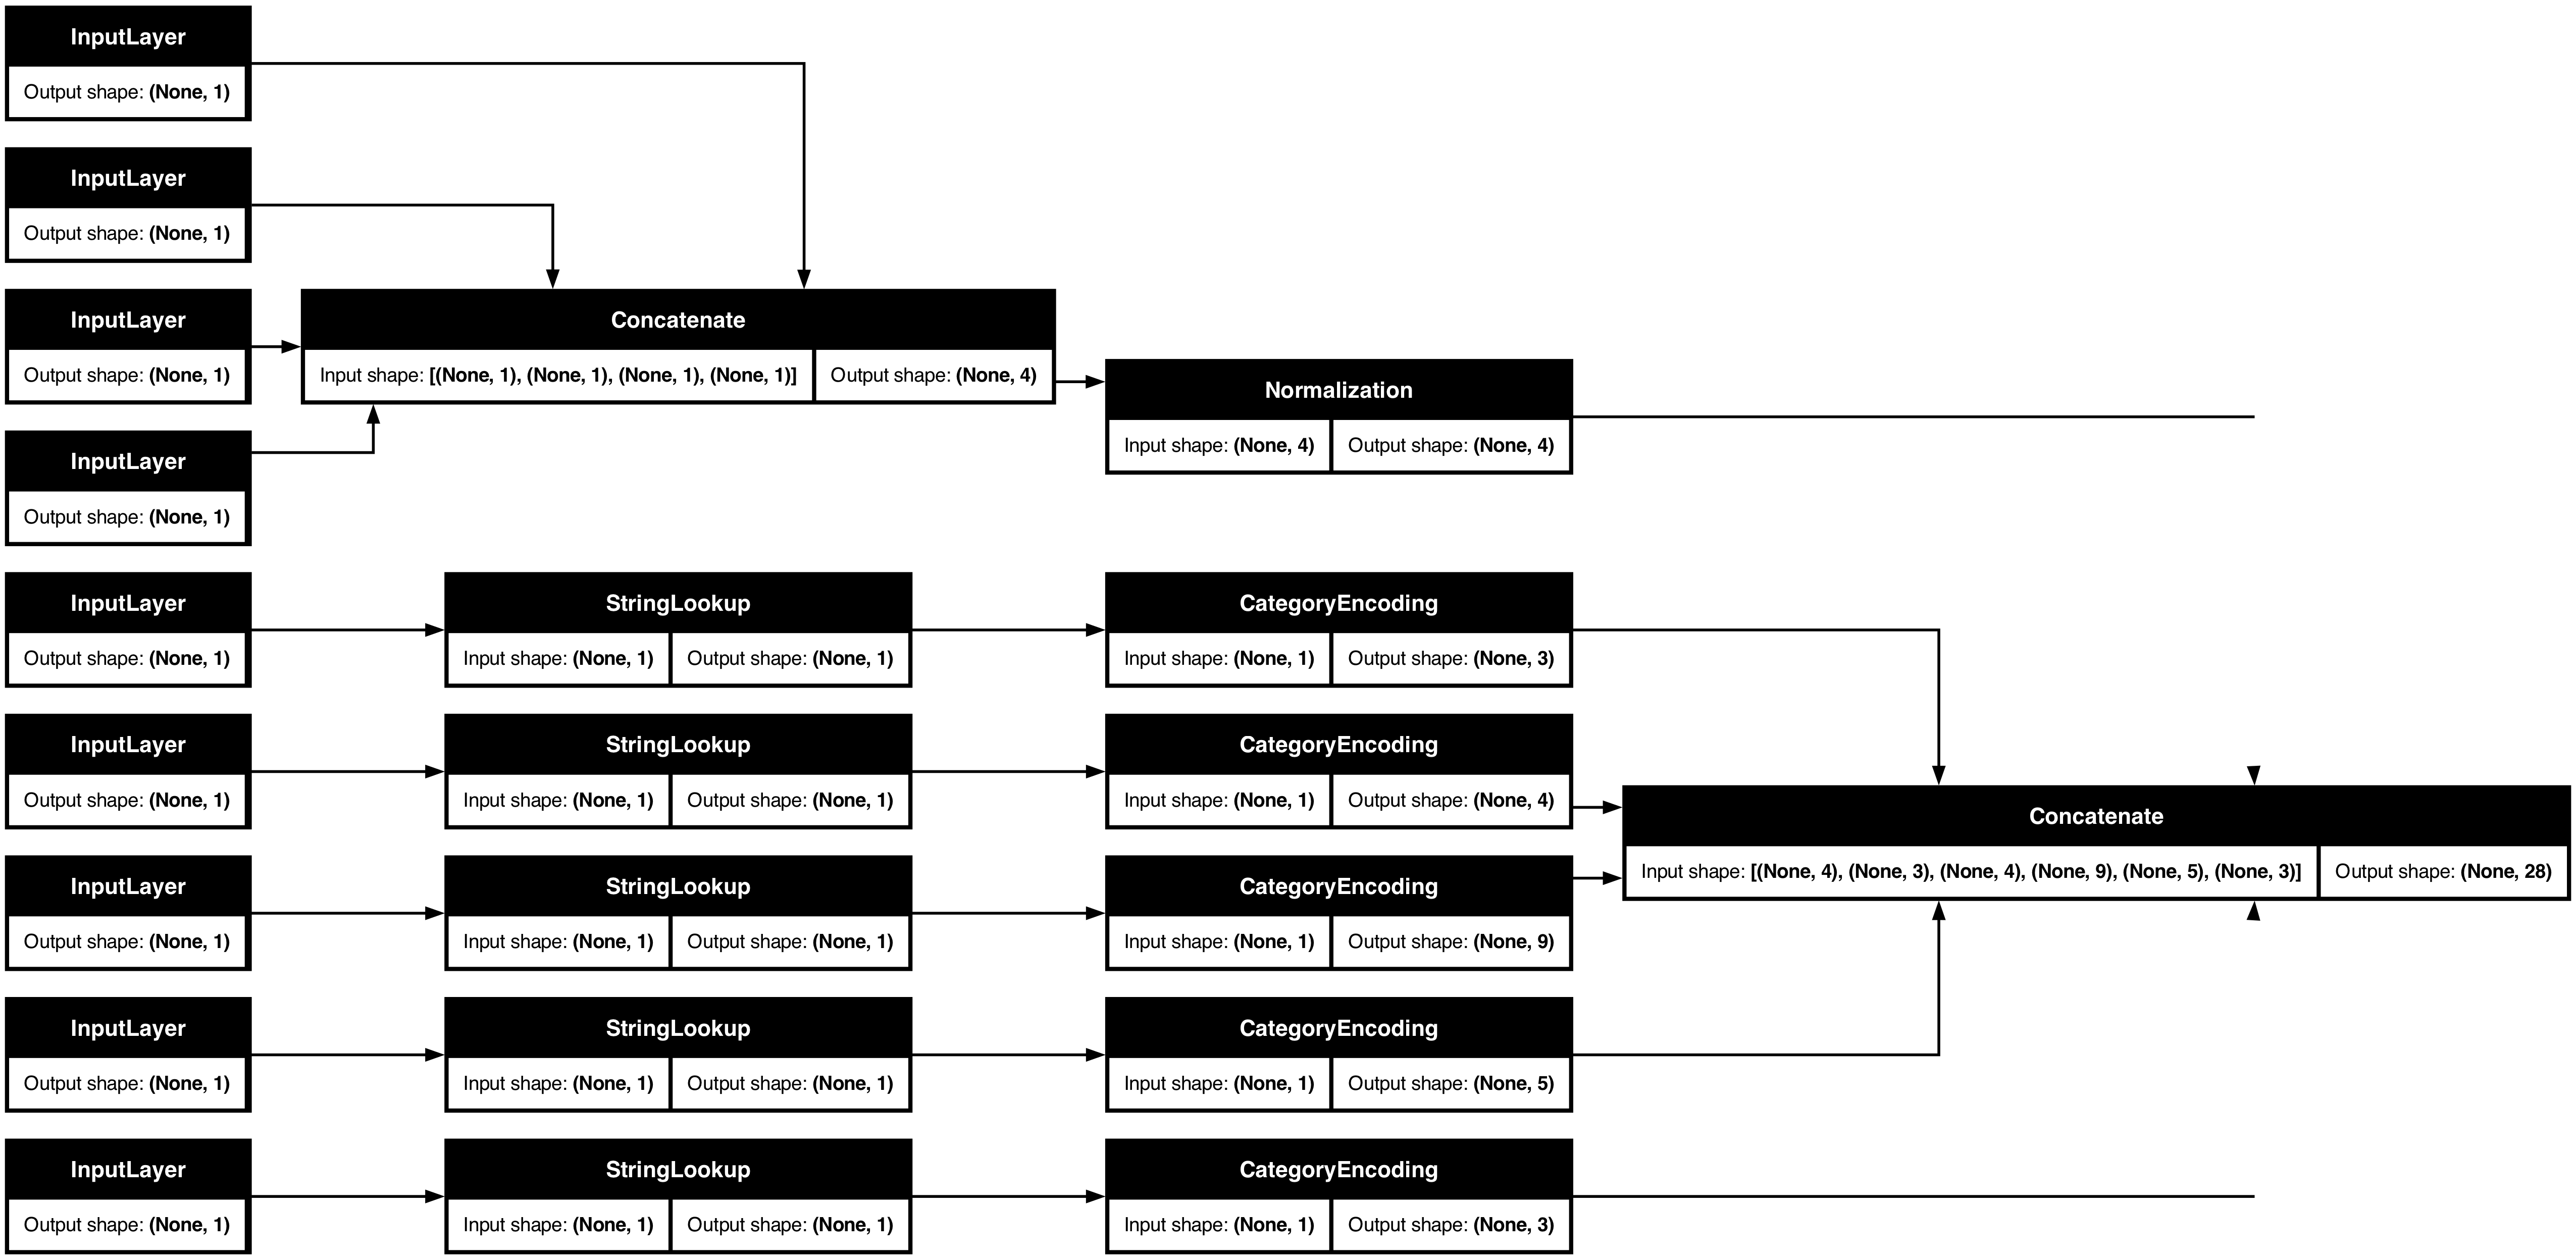

In [22]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

#!brew install graphviz

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=200, show_shapes=True)

In [23]:
titanic_features_dict = {
    name: np.array(value) for name, value in titanic_features.items()
}

In [24]:
titanic_features_dict

{'sex': array(['male', 'female', 'female', 'female', 'male', 'male', 'female',
        'female', 'female', 'male', 'male', 'female', 'male', 'male',
        'female', 'female', 'male', 'male', 'female', 'male', 'male',
        'female', 'male', 'male', 'female', 'female', 'male', 'male',
        'male', 'male', 'female', 'female', 'female', 'male', 'female',
        'male', 'male', 'male', 'female', 'male', 'female', 'female',
        'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male',
        'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
        'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female',
        'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
        'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male',
        'male', 'male', 'male', 'female', 'male', 'female', 'male',
        'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
        'male', 'male', 'male', 'male', 'female',

In [25]:
features_dict = {
    name: values[:1] for name, values in titanic_features_dict.items()
}

titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [26]:
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)

    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam()
    )

    return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [30]:
titanic_model.fit(
    x = titanic_features_dict,
    y = titanic_labels,
    epochs=10
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6997
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5861
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5501
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4893
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4591
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4537
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4308
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4211
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4218
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4094


In [32]:
titanic_model.save('models/titanic_test.keras')

In [34]:
reloaded = tf.keras.models.load_model('models/titanic_test.keras')

In [35]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)

assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.948]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.948]], shape=(1, 1), dtype=float32)
